In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family']=['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action='ignore')
np.random.seed(42)

## 节点分割依据
- 根节点：选择分类效果最强
- 节点：以特征的分类效果由强到弱
- 目标：通过一个衡量标准，来计算通过不同特征进行分支选择后的分类情况，使得分类效果由强到弱
### 熵
- 表示随机变量确定性的度量
- 使分类后的熵最小，则分类效果最好，节点就越靠前
- $H(D) = - \sum_{i=1}^n p(x_i) \log_2 p(x_i)$
- 信息增益（ID3）：表示特征X使得类Y的不确定性减少的程度
    - ID3:$\text{Gain}(D, A) = H(D) - \sum_{i=1}^k \frac{|D_i|}{|D|} \cdot H(D_i)$
- 信息增益率（C4.5）:在信息增益的基础上，考虑了自身熵的影响
    - C4.5:固有值$\text{IV}(A) = -\sum_{i=1}^k \frac{|D_i|}{|D|} \log_2 \left(\frac{|D_i|}{|D|}\right)$
    - $\text{GainRatio}(D, A) = \frac{\text{Gain}(D, A)}{\text{IV}(A)}$ 
- CART:使用GINI系数来当作衡量标准
- GINI系数：$G(X) = \sum_{i=1}^n p(x_i) (1-p(x_i)) = 1 - \sum_{i=1}^n p(x_i)^2$
## 连续值（离散化）
- 节点：以特征X的取值范围进行分割
- 对数据进行切分（形成二分类问题），找到切分点使得切分后的数据集的熵最小
## 剪枝（防止过拟合）
- 预剪枝：在构建决策树之前，对数据集进行预处理，对数据集进行剪枝，（限制深度，叶子节点个数，叶子节点样本数，信息增益量等）
- 后剪枝：通过一定衡量标准
    - 剪枝标准：$Gain_\alpha (T) = Gain (T) + \alpha |T_{leaf}|$
- ![](img/img_6.png) 
- 计算方法演示
    - $0.44 \times 6 + 1 \times \alpha$
    - $0 \times 3 +0.44 \times 3 + 2 \times \alpha$
    - $\alpha$的大小越大，叶子节点越多，损失越大，过拟合概率越小
## 回归
- 评判标准方差

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:]
y=iris.target
print(iris.DESCR)

tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

DecisionTreeClassifier(max_depth=2)

可以使用 dot-Tpng iris_tree.dot -o iris_tree.png 命令将生成的树可视化

In [33]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="img/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

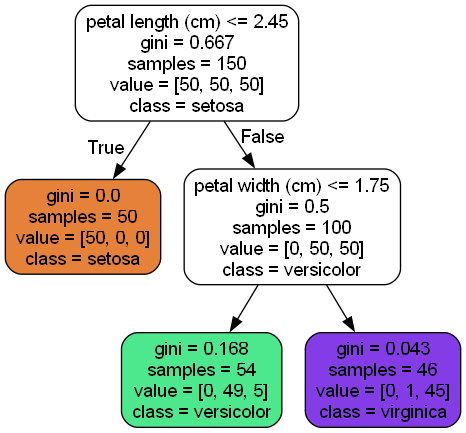

In [34]:
import subprocess

#使用subprocess模块调用dot命令
subprocess.run(["dot", "-Tpng", "img/iris_tree.dot", "-o", "img/iris_tree.png"])
from IPython.display import Image
Image(filename="img/iris_tree.png", width=400,height=400)

In [14]:
tree_clf.predict([[5,1.5]]),tree_clf.predict_proba([[5,1.5]])

(array([1]), array([[0.        , 0.90740741, 0.09259259]]))

## 决策边界

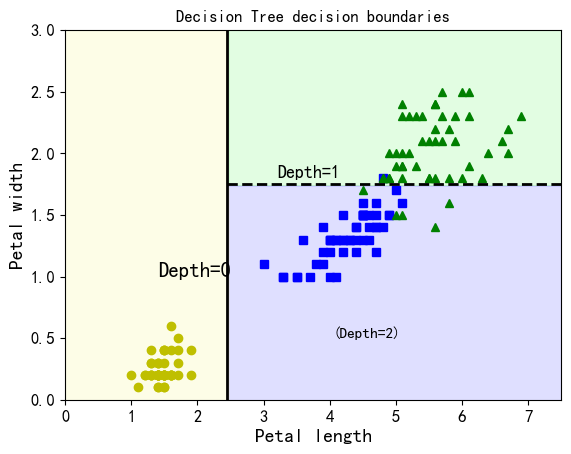

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3],iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        plt.figure(figsize=(8, 4))
        
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.title('Decision Tree decision boundaries')
plt.show()

## 决策树的正则化
- DecisionTreeClassifier 类还有一些其他参数类似地限制了决策树的形状
    - min_samples_split（节点在分割之前必须具有的最小样本数）
    - min_samples_leaf（叶子节点必须具有的最小样本数）
    - max_leaf_nodes（叶子节点的最大数量）
    - max_features（在每个节点处评估用于拆分的最大特征数）
    - max_depth（树最大深度）
    

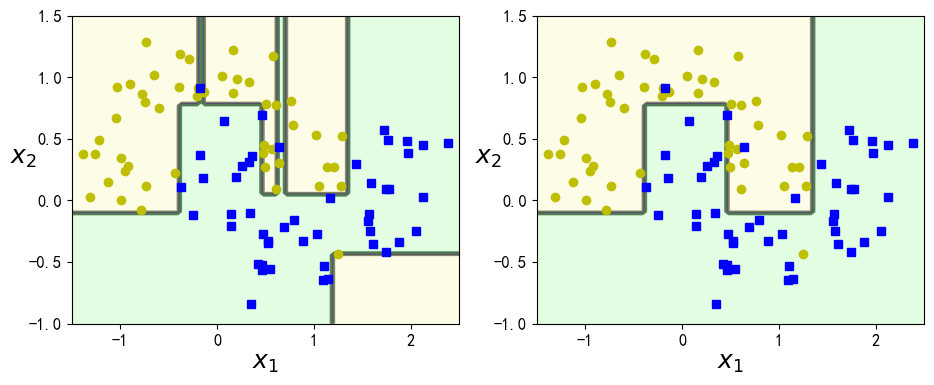

In [21]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=53)
tree_clf1=DecisionTreeClassifier(random_state=42)
tree_clf2=DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
tree_clf1.fit(X,y)
tree_clf2.fit(X,y)
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf1,X,y,axes=[-1.5, 2.5,-1, 1.5],iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf2,X,y,axes=[-1.5, 2.5,-1, 1.5],iris=False)

## 对数据的敏感度当数据集旋转一个角度，边界不会跟随，会出现矩形边界

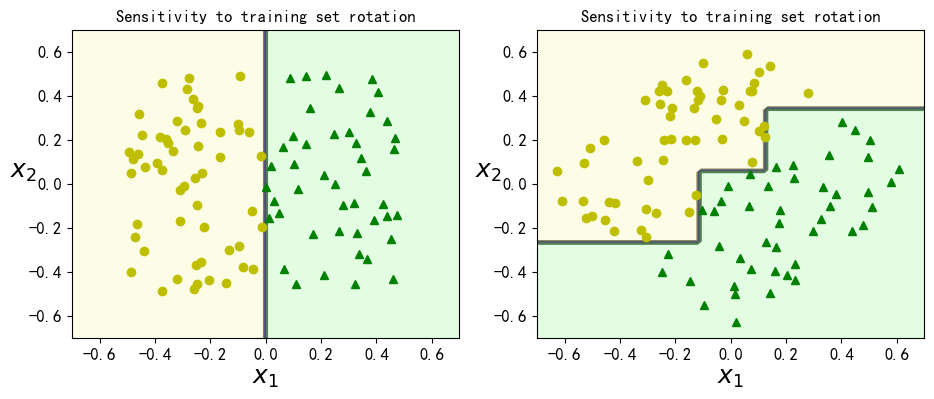

In [20]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title('Sensitivity to training set rotation')

plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title('Sensitivity to training set rotation')

plt.show()

## 回归任务

In [22]:
np.random.seed(42)
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2
y=y+np.random.randn(m,1)/10

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [25]:
export_graphviz(
    tree_reg,
    out_file="img/tree_reg.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

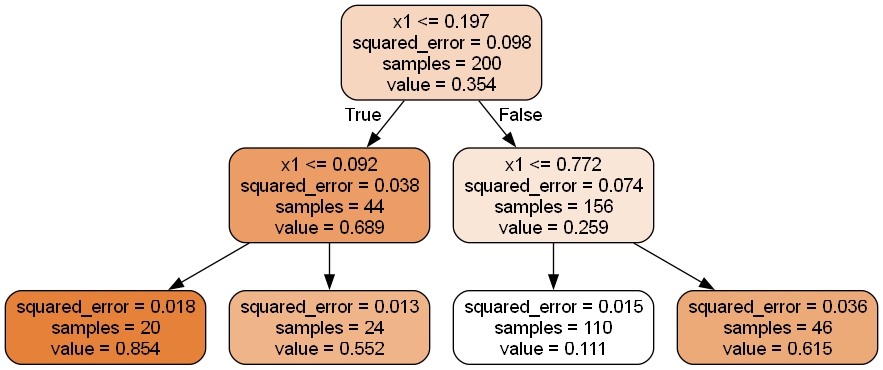

In [26]:
subprocess.run(["dot", "-Tpng", "img/tree_reg.dot", "-o", "img/tree_reg.png"])
from IPython.display import Image
Image(filename="img/tree_reg.png", width=400,height=400)

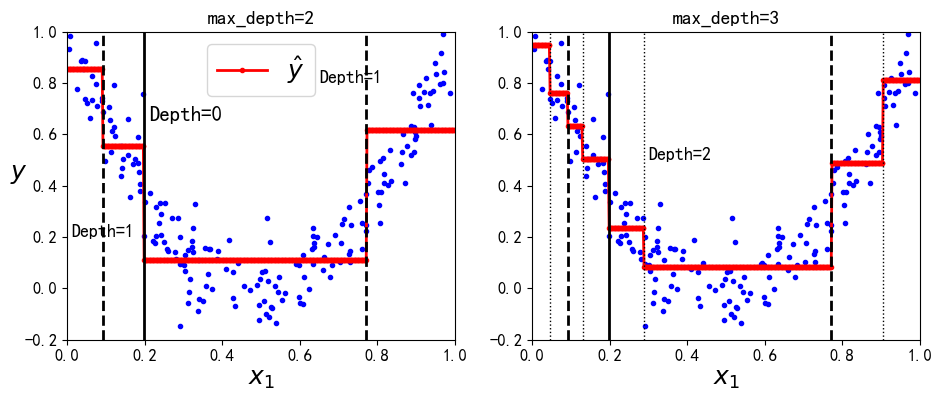

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)

plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)

plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

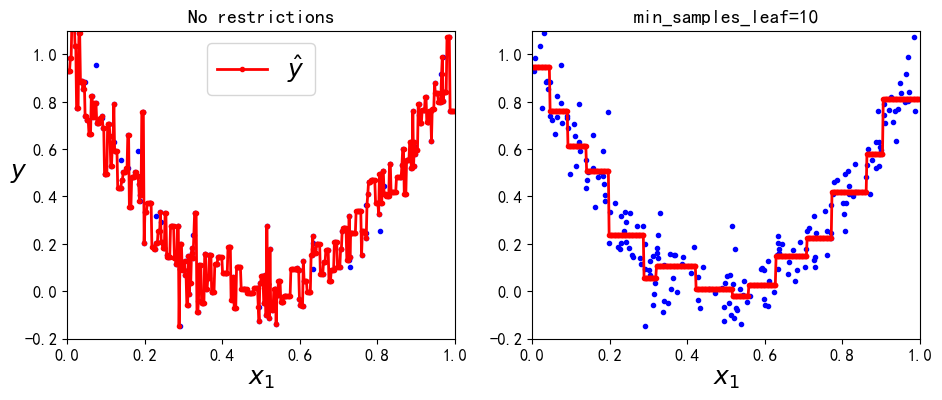

In [36]:
# 初始化并训练决策树回归模型
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# 生成用于预测的新数据
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

# 绘图
plt.figure(figsize=(11, 4))

# 绘制第一个子图（无限制的决策树）
plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

# 绘制第二个子图（设置 min_samples_leaf 的决策树）
plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}", fontsize=14)

plt.show()